In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive

drive.mount('./now1')

Drive already mounted at ./now1; to attempt to forcibly remount, call drive.mount("./now1", force_remount=True).


In [3]:
cd now1/My Drive/DACON

/content/now1/My Drive/DACON


In [4]:
import glob

files = glob.glob('dacon_data/*')
files

['dacon_data/address_code.xls',
 'dacon_data/Schools.csv',
 'dacon_data/submission.csv',
 'dacon_data/test.csv',
 'dacon_data/Subways.csv',
 'dacon_data/train.csv',
 'dacon_data/test1.csv']

In [5]:
train_raw = pd.read_csv(files[5], encoding='utf-8')
print(train_raw.shape)
train_raw.head(3)

(1601458, 25)


,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000


In [6]:
test_raw = pd.read_csv(files[6], encoding='utf-8')
print(test_raw.shape)
test_raw.head(3)

(3918, 25)


,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,462533,3751,1,200912,21~31,1984,83.58,14,37.519926,127.052515,...,15.0,district,cogeneration,6648,107.19,2,3.0,1.0,corridor,965000000
1,764018,14029,1,201304,1~10,1968,107.17,10,37.572215,126.987643,...,8.0,individual,gas,46184,107.17,10,0.0,0.0,corridor,330000000
2,813528,12304,1,201309,21~30,1968,36.17,6,37.570067,127.010640,...,4.0,individual,gas,45540,39.66,58,2.0,1.0,stairway,98000000


In [7]:
print(train_raw.shape)  # (1601458, 25)
print(test_raw.shape) # (3918, 25)  key 462533
test_raw_start= test_raw.shape[0]

(1601458, 25)
(3918, 25)


In [8]:
TR = pd.concat([train_raw, test_raw]) 
TR.shape

(1605376, 25)

In [0]:
TR.reset_index(inplace= True)
TR.drop('index', axis=1, inplace= True)

In [0]:
#data_set.iloc[-1*test_raw_start:].head(5)
#data_set.iloc[1000000:-1*test_raw_start].head(5)

# 데이터 이상치 제거: outlier제거, 0, NaN값 제거

In [0]:
# TR = data_set[:].copy()
# TR.shape

In [0]:
nanIdx = TR[TR['total_parking_capacity_in_site'].isnull()].index #평균적인 세대수대비 주차공간(1.0)을 계산하여 넣는다.
if nanIdx.any():
    TR.loc[nanIdx, 'total_parking_capacity_in_site']=  TR.loc[nanIdx, 'total_household_count_in_sites']
    
nanIdx = TR[TR['heat_type'].isnull()].index # nan값을 '-'으로 대체한다.
if nanIdx.any():
    TR.loc[nanIdx, 'heat_type']=  '-'

nanIdx = TR[TR['heat_fuel'].isnull()].index # nan값을 '-'으로 대체한다.
if nanIdx.any():
    TR.loc[nanIdx, 'heat_fuel']=  '-'
    
nanIdx = TR[TR['front_door_structure'].isnull()].index # 376개, '-'으로 대체한다.
if nanIdx.any():
    TR.loc[nanIdx, 'front_door_structure']=  '-'


# TR['room_count']# nan값 및 0을 평수에 따라 방수를 적절하게 대체한다.
# TR['bathroom_count'] # nan값 및 0을 평수에 따라 욕실수를 적절하게 대체한다.

def fill_room(s):
    if s < 50:
        return 2
    elif 50 <= s < 100:
        return 3
    elif 100 <= s < 150:
        return 4
    else:
        return 5

# 50평 이하 2개
# 50평 100평 사이 3개
# 100평 150평 사이 4개
# 150평 이상 5개
nanIdx = TR[TR['room_count'].isnull()].index
if nanIdx.any():
    TR.loc[nanIdx, 'room_count'] = TR.loc[nanIdx, 'exclusive_use_area'].apply(fill_room)
    
nanIdx = TR[TR['room_count'] == 0].index
if nanIdx.any():
    TR.loc[nanIdx, 'room_count'] = TR.loc[nanIdx, 'exclusive_use_area'].apply(fill_room)

    
def fill_bathroom(s):
    if s < 50:
        return 1
    elif 50 <= s < 200:
        return 2
    else:
        return 3

# 50평 이하 1개
# 50평 200평 사이 2개
# 200평 이상 3개
nanIdx = TR[TR['bathroom_count'].isnull()].index
if nanIdx.any():
    TR.loc[nanIdx, 'bathroom_count'] = TR.loc[nanIdx, 'exclusive_use_area'].apply(fill_bathroom)

nanIdx = TR[TR['bathroom_count'] == 0].index
if nanIdx.any():
    TR.loc[nanIdx, 'bathroom_count'] = TR.loc[nanIdx, 'exclusive_use_area'].apply(fill_bathroom)    
    
   


# 특성 생성

In [0]:
year_list=[]
month_list=[]
#date_list=[]

for dt1, dt2 in zip(TR['transaction_year_month'], TR['transaction_date']):
    dt1= str(dt1)
   # dt2= dt2.split('~')[0]
    year_list.append(int(dt1[2:4]))
    month_list.append(int(dt1[4:]))
   # date_list.append(int(dt2))  

TR['transaction_year'] = pd.Series(year_list, index= TR.index)
TR['transaction_month'] = pd.Series(month_list, index= TR.index)

year_quarter_dict= {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}
TR['year_quarter'] = TR['transaction_month'].map(year_quarter_dict)
        

In [0]:
time_cat_encoded, time_categories= TR['transaction_year_month'].factorize()
TR['tran_date_time2'] = pd.Series(time_cat_encoded, index= TR.index)

In [15]:
gu_list= []
# for i in TR['address_by_law'].values:
#     gu_list.append(str(i)[:5])
for i in TR['address_by_law'].values:
    if str(i)[:2] == '26' or str(i)[:2] == '11':
        gu_list.append(str(i)[:5])
    else:
        gu_list.append('26410')


print(len(gu_list))
print(len(TR['address_by_law'].unique()))
print(len(pd.Series(gu_list).unique())) # 모든 구가 포함되어있음. 41개의 특성으로 원핫인코딩

TR['region']= pd.Series(gu_list, index= TR.index)


1605376
379
41


In [0]:
#TR[TR['address_by_law']==2824510900]
TR['address_by_law']= TR['address_by_law'].replace(2824510900, 1168011800)

In [0]:
apt_age_year_list=[]
for i,j in zip(TR['transaction_year_month'].values, TR['year_of_completion'].values) :
    i= str(i)
    apt_age_year_list.append(int(i[0:4]) - j)


TR['apt_age_year'] = pd.Series(apt_age_year_list, index= TR.index)
TR['real_price_by_area']= TR['transaction_real_price'] / TR['exclusive_use_area']

In [0]:
time_gu_list=[]
time_gu_list_lag1=[]
quarter_lag1=[4,1,2,3]

for yr, yq, gu in zip(TR['transaction_year'], TR['year_quarter'], TR['region']):
    yq_lag1= quarter_lag1[yq-1]
    yr_lag1= yr
    if yq_lag1 == 4:
        yr_lag1 = yr-1
    # 예외값 처리
    if yr_lag1 <= 5: # 2006년 이전
        yr_lag1 = 6 # 2006년
        yq_lag1= 1 # 1분기       
    elif yr_lag1 >= 19: # 2019년 이후
        yr_lag1 = 18 # 2018년
        yq_lag1= 4 # 4분기
        
    time_gu_list.append(str(yr)+'-'+str(yq)+'-'+gu)
    time_gu_list_lag1.append(str(yr_lag1)+'-'+str(yq_lag1)+'-'+gu)

TR['year4q_region'] = pd.Series(time_gu_list, index= TR.index)
TR['year4q_region_lag1'] = pd.Series(time_gu_list_lag1, index= TR.index)


In [0]:
#TR[['year4q_region', 'year4q_region_lag1', 'transaction_year_month']].iloc[100000: 520000]

In [0]:
year_dong_list=[]
year_dong_list_lag1=[]

for yr, dong in zip(TR['transaction_year'], TR['address_by_law']):
    yr_lag1= yr-1
    if yr_lag1 <= 5: # 2006년 이전
        yr_lag1 = 6 # 2006년
    elif yr_lag1 >= 19: # 2019년 이후
        yr_lag1 = 18 # 2018년
    year_dong_list.append(str(yr)+'-'+str(dong))
    year_dong_list_lag1.append(str(yr_lag1)+'-'+str(dong))

TR['year_dong'] = pd.Series(year_dong_list, index= TR.index)
TR['year_dong_lag1'] = pd.Series(year_dong_list_lag1, index= TR.index)

In [0]:
#TR[['year4q_region', 'year4q_region_lag1','year_dong', 'year_dong_lag1', 'transaction_year_month', 'address_by_law']].iloc[200000: 520000]

In [0]:
# # 주소(동)에 위치한 지하철역 개수

# subways = pd.read_csv(files[4], encoding='utf-8')
# print(subways.shape)
# subways_cnt_s= subways['address_by_law'].value_counts()
# subways_cnt_list= []
# # for j in TR['address_by_law'].values:
# #     i= subways[subways['address_by_law']== j ].index
# #     subways_cnt_list.append(len(i))
# # 처리시간이 너무 오래걸린다.

# for j in TR['address_by_law'].values:
#     try:
#         subways_cnt_list.append(subways_cnt_s.loc[j])
#     except KeyError:
#         subways_cnt_list.append(0)
    

# # 주소(동)에 위치한 학교 개수

# schools = pd.read_csv(files[1], encoding='utf-8')
# print(schools.shape)
# schools_cnt_s= schools['address_by_law'].value_counts()
# schools_cnt_list= []

# for j in TR['address_by_law'].values:
#     try:
#         schools_cnt_list.append(schools_cnt_s.loc[j])
#     except KeyError:
#         schools_cnt_list.append(0)



In [0]:
df_temp= TR.iloc[:-1*test_raw_start].copy()

TB0 = df_temp.groupby(['year4q_region'])['real_price_by_area'].mean()
TB1 = df_temp.groupby(['year_dong'])['real_price_by_area'].mean()


year4q_region_dict= {}
for i in df_temp['year4q_region'].unique():
#     yr= int(i.split('-')[0])
#     gu= i.split('-')[1]
    year4q_region_dict[i]= TB0.loc[i]


    year_dong_dict= {}
for i in df_temp['year_dong'].unique():
#     yr= int(i.split('-')[0])
#     gu= i.split('-')[1]
    year_dong_dict[i]= TB1.loc[i]
    

In [0]:
TR['year4q_region_price_mean']= TR['year4q_region_lag1'].map(year4q_region_dict)
TR['year_dong_price_mean']= TR['year_dong_lag1'].map(year_dong_dict)

In [24]:
TR['year_dong_price_mean'][TR['year_dong_price_mean'].isnull() == True] = TR['year4q_region_price_mean'][TR['year_dong_price_mean'].isnull() == True]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
TR[TR['year_dong_price_mean'].isnull() == True]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,tran_date_time2,region,apt_age_year,real_price_by_area,year4q_region,year4q_region_lag1,year_dong,year_dong_lag1,year4q_region_price_mean,year_dong_price_mean


In [26]:
TR[TR['year4q_region_price_mean'].isnull() == True]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,tran_date_time2,region,apt_age_year,real_price_by_area,year4q_region,year4q_region_lag1,year_dong,year_dong_lag1,year4q_region_price_mean,year_dong_price_mean


In [0]:
#TR[['year4q_region', 'year4q_region_lag1','year_dong', 'year_dong_lag1', 'year_dong_price_mean', 'year4q_region_price_mean']].iloc[200000: 520000]

In [28]:
TR.isnull().any()

key                                   False
apartment_id                          False
city                                  False
transaction_year_month                False
transaction_date                      False
year_of_completion                    False
exclusive_use_area                    False
floor                                 False
latitude                              False
longitude                             False
address_by_law                        False
total_parking_capacity_in_site        False
total_household_count_in_sites        False
apartment_building_count_in_sites     False
tallest_building_in_sites              True
lowest_building_in_sites               True
heat_type                             False
heat_fuel                             False
room_id                               False
supply_area                           False
total_household_count_of_area_type    False
room_count                            False
bathroom_count                  

In [30]:
TR1 = TR[['key']].copy()
TR1['city'] = TR['city']
# TR1['region'] = TR['region']
TR1['address_by_law'] = TR['address_by_law']
# TR1['subway_count'] = pd.Series(subways_cnt_list)
# TR1['school_count'] = pd.Series(schools_cnt_list)
TR1['transaction_year'] = TR['transaction_year']
TR1['transaction_month'] = TR['transaction_month']
TR1['tran_date_time2'] = TR['tran_date_time2'] # 추가
TR1['apt_age_year'] = TR['apt_age_year']
TR1['year_of_completion']= TR['year_of_completion'] - 1900  # 추가
TR1['exclusive_use_area'] = TR['exclusive_use_area'] 
TR1['floor'] = TR['floor']
TR1['parking_ratio'] = TR['total_parking_capacity_in_site'] / TR['total_household_count_in_sites']
TR1['total_household_count_in_sites'] = TR['total_household_count_in_sites']
TR1['apartment_building_count_in_sites'] = TR['apartment_building_count_in_sites']
TR1['area_ratio'] = TR['exclusive_use_area'] / TR['supply_area']
TR1['room_count'] = TR['room_count']
#TR1['bathroom_count'] = TR['bathroom_count']
TR1['year_dong_price_mean']= TR['year_dong_price_mean']
TR1['year4q_region_price_mean']= TR['year4q_region_price_mean']
TR1['transaction_real_price'] = TR['transaction_real_price'] / TR['exclusive_use_area']
TR1.shape


(1605376, 18)

# 데이터 준비: 모델링에 적용할수있는 형식으로 만든다.

## (1) 카테고리화된 값(범주형특성)들은 원핫인코딩
## (2) 연속적인 숫자들은 스케일링

In [0]:
df_rg = pd.get_dummies(TR1['address_by_law'], prefix= 'rg')
# df_yr = pd.get_dummies(TR1['transaction_year'], prefix= 'yr')
# df_mo = pd.get_dummies(TR1['transaction_month'], prefix= 'mo')
# df_ht = pd.get_dummies(TR1['heat_type'], prefix= 'ht')
# df_hf = pd.get_dummies(TR1['heat_fuel'], prefix= 'hf')
# df_fd = pd.get_dummies(TR1['front_door_structure'], prefix= 'fd')

try:
    TR1= TR1.join(df_rg)
except:
    print('dummies_region 이미 추가되었음.')
try:
    del TR1['address_by_law']
    pass
except:
    print('region 컬럼 이미 삭제됨')
    
            
# try:
#     TR1= TR1.join(df_yr)
# except:
#     print('dummies_year 이미 추가되었음.')
# try:
#     del TR1['transaction_year']
#     pass
# except:
#     print('year 컬럼 이미 삭제됨')


# try:
#     TR1= TR1.join(df_mo)
# except:
#     print('dummies_tr_month 이미 추가되었음.')
# try:
#     del TR1['transaction_month']
# except:
#     print('transaction_month 컬럼 이미 삭제됨')
    

# try:
#     TR1= TR1.join(df_ht)
# except:
#     print('dummies_heat_type 이미 추가되었음.')
# try:
#     del TR1['heat_type']
# except:
#     print('heat_type 컬럼 이미 삭제됨')
    
# try:
#     TR1= TR1.join(df_hf)
# except:
#     print('dummies_heat_fuel 이미 추가되었음.')
# try:
#     del TR1['heat_fuel']
# except:
#     print('heat_fuel 컬럼 이미 삭제됨')

# try:
#     TR1= TR1.join(df_fd)
# except:
#     print('dummies_fr_door_str 이미 추가되었음.')
# try:
#     del TR1['front_door_structure']
# except:
#     print('front_door_structure 컬럼 이미 삭제됨')
    
    
    


In [0]:
# adr_cat_encoded, adr_categories= TR1['address_by_law'].factorize()
# ht_cat_encoded, ht_categories= TR1['heat_type'].factorize()
# hf_cat_encoded, hf_categories= TR1['heat_fuel'].factorize()
# fd_cat_encoded, fd_categories= TR1['front_door_structure'].factorize()

# TR1['address_by_law2'] = pd.Series(adr_cat_encoded, index= TR1.index)
# TR1['heat_type2'] = pd.Series(ht_cat_encoded, index= TR1.index)
# TR1['heat_fuel2'] = pd.Series(hf_cat_encoded, index= TR1.index)
# TR1['front_door_structure2'] = pd.Series(fd_cat_encoded, index= TR1.index)

In [0]:
#TR1.isnull().any()

In [32]:
print(TR1.shape)
TR1.head()
# (1121020, 79)

(1605376, 395)


,key,city,transaction_year,transaction_month,tran_date_time2,apt_age_year,year_of_completion,exclusive_use_area,floor,parking_ratio,...,rg_2671025028,rg_2671025034,rg_2671025621,rg_2671025622,rg_2671025625,rg_2671025627,rg_2671025628,rg_2671031021,rg_2671031022,rg_2671033029
0,0,1,6,1,0,7,99,47.43,6,1.198529,...,0,0,0,0,0,0,0,0,0,0
1,1,1,6,1,0,7,99,44.37,8,1.198529,...,0,0,0,0,0,0,0,0,0,0
2,2,1,6,1,0,14,92,54.70,8,1.541880,...,0,0,0,0,0,0,0,0,0,0
3,3,1,6,1,0,13,93,64.66,11,0.981502,...,0,0,0,0,0,0,0,0,0,0
4,4,1,6,1,0,13,93,106.62,7,0.981502,...,0,0,0,0,0,0,0,0,0,0


In [33]:
print(TR1.columns)

Index(['key', 'city', 'transaction_year', 'transaction_month',
       'tran_date_time2', 'apt_age_year', 'year_of_completion',
       'exclusive_use_area', 'floor', 'parking_ratio',
       ...
       'rg_2671025028', 'rg_2671025034', 'rg_2671025621', 'rg_2671025622',
       'rg_2671025625', 'rg_2671025627', 'rg_2671025628', 'rg_2671031021',
       'rg_2671031022', 'rg_2671033029'],
      dtype='object', length=395)


In [0]:
TR1['exclusive_use_area']=np.log(TR1['exclusive_use_area']+1)
TR1['parking_ratio']=np.log(TR1['parking_ratio']+1)
TR1['total_household_count_in_sites']=np.log(TR1['total_household_count_in_sites']+1)
TR1['apartment_building_count_in_sites']=np.log(TR1['apartment_building_count_in_sites']+1)
TR1['transaction_real_price']=np.log(TR1['transaction_real_price']+1)

TR1['year_dong_price_mean']=np.log(TR1['year_dong_price_mean']+1)
TR1['year4q_region_price_mean']=np.log(TR1['year4q_region_price_mean']+1)

In [35]:
# 스케일링

# TR1_scale_col= ['transaction_year', 'transaction_month', 'tran_date_time2', 'tran_date_time3',
#                 'apt_age_year', 'apt_age_year2', 'year_of_completion', 
#                 'exclusive_use_area', 'floor', 'floor2','parking_ratio',
#                 'total_household_count_in_sites','apartment_building_count_in_sites','area_ratio',
#                 'room_count','bathroom_count','transaction_real_price']

TR1_scale_col= ['transaction_year','transaction_month', 'tran_date_time2',
                'apt_age_year', 'year_of_completion',
                'exclusive_use_area','floor','parking_ratio',
                'total_household_count_in_sites','apartment_building_count_in_sites','area_ratio', 'room_count',
                'year_dong_price_mean','year4q_region_price_mean',
                'transaction_real_price']



# from sklearn.preprocessing import MinMaxScaler

# scaler_list=[]
# for col in TR2_scale_col:
#     scaler= MinMaxScaler()
#     TR2[col]= scaler.fit_transform(TR2[col].values.reshape(-1,1)).reshape(-1,)
#     scaler_list.append(scaler)


from sklearn.preprocessing import RobustScaler

scaler_list=[]
for col in TR1_scale_col:
    print(col)
    scaler= RobustScaler()
    TR1[col]= scaler.fit_transform(TR1[col].values.reshape(-1,1)).reshape(-1,)
    scaler_list.append(scaler)




transaction_year
transaction_month
tran_date_time2
apt_age_year
year_of_completion
exclusive_use_area
floor
parking_ratio
total_household_count_in_sites
apartment_building_count_in_sites
area_ratio
room_count
year_dong_price_mean
year4q_region_price_mean
transaction_real_price


In [0]:
# array_temp= np.array(TR1[TR1.columns[16:-11]])
# array_temp= array_temp * TR1['tran_date_time2'].values.reshape(-1,1)
# TR1[TR1.columns[16:-11]]= pd.DataFrame(array_temp)


In [0]:
TR1_target= TR1[['transaction_real_price']].copy()
del TR1['transaction_real_price']

In [37]:
print(TR1.shape)
TR1.head(3)

(1605376, 394)


,key,city,transaction_year,transaction_month,tran_date_time2,apt_age_year,year_of_completion,exclusive_use_area,floor,parking_ratio,...,rg_2671025028,rg_2671025034,rg_2671025621,rg_2671025622,rg_2671025625,rg_2671025627,rg_2671025628,rg_2671031021,rg_2671031022,rg_2671033029
0,0,1,-1.0,-0.833333,-1.1375,-0.500000,0.000000,-1.642043,-0.333333,0.420340,...,0,0,0,0,0,0,0,0,0,0
1,1,1,-1.0,-0.833333,-1.1375,-0.500000,0.000000,-1.830753,-0.111111,0.420340,...,0,0,0,0,0,0,0,0,0,0
2,2,1,-1.0,-0.833333,-1.1375,0.083333,-0.583333,-1.237666,-0.111111,1.265552,...,0,0,0,0,0,0,0,0,0,0


# 모델학습 및 평가

In [0]:
X_test_key = TR1.iloc[-1*test_raw_start:].copy()
y_test = TR1_target.iloc[-1*test_raw_start:].copy()
X_test = X_test_key[X_test_key.columns[1:]] # Key삭제
y_test.fillna(0.373488, inplace= True)

In [0]:
X_train_key= TR1.iloc[:-1*test_raw_start]
y_train_0= TR1_target.iloc[:-1*test_raw_start]
X_train_0= X_train_key[X_train_key.columns[1:]]

In [0]:
#랜덤하게 섞은 다음 train set과 test set을 나눈다.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_0, y_train_0, test_size=0.1, shuffle= True, random_state=42)

# Key를 제외한다.
# X_train= X_train_key[X_train_key.columns[1:]]
# X_test= X_test_key[X_test_key.columns[1:]]

In [41]:
print(X_train.shape)
print(X_test.shape)

(1441312, 393)
(3918, 393)


In [42]:
y_test.head(3)

,transaction_real_price
1601458,1.274652
1601459,-0.430864
1601460,-0.595962


In [43]:
import keras
from keras import layers, models
import random as rd
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from sklearn.metrics import accuracy_score

np.random.seed(5)

keras.backend.clear_session()
model = keras.models.Sequential()

#800, 400, 200

model.add( layers.Dense(800, input_shape=(X_train.shape[1],), activation='relu' ))
model.add( layers.Dense(400, activation='relu' ))
model.add( layers.Dense(200, activation='relu' ))
#model.add( layers.Dense(100, activation='relu' ))
model.add( layers.Dense(1) )

#model.compile(loss = 'mse', optimizer = 'adam', metrics =['accuracy']) 
#model.compile(loss = 'mse', optimizer = 'adam', metrics =['accuracy']) 


Using TensorFlow backend.


In [0]:
# import keras
# from keras.utils import np_utils
# from keras.layers import Dense, BatchNormalization, Activation, Dropout
# from keras import layers, models
# import random as rd
# from sklearn.metrics import accuracy_score

# keras.backend.clear_session()
# model = models.Sequential()

# model.add( Dense(200, input_shape=(X_train.shape[1],), name = 'Hidden1', # activation = 'relu',
#                 kernel_initializer = 'glorot_uniform',
#                 bias_initializer = 'glorot_uniform'))

# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add( Dropout(0.1) )

# ### 노드 수를 마음 껏 조절해보자!
# model.add( Dense(200, name = 'Hidden2', # activation = 'relu',
#                 kernel_initializer = 'glorot_uniform',
#                 bias_initializer = 'glorot_uniform') )

# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add( Dropout(0.1) )

# # output Layer
# model.add( layers.Dense(1, name = 'OutputLayer') )


In [44]:
from keras import optimizers

# Optimizer 상세 조절!
# lr : Learning Rate에 대해서 공부하자! -> 에러가 요동치거나 줄어들지않을때 러닝레이트를 줄인다.
# adam = optimizers.Adam(lr=0.001, decay=0.0) 기본셋팅


adam = optimizers.Adam(lr=0.01, decay=0.0001)
# 컴파일
model.compile(loss = 'mse', optimizer = 'adam', metrics =['accuracy']) 
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               315200    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 716,001
Trainable params: 716,001
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 데이터 학습
history = model.fit(X_train, y_train, epochs=50, batch_size = 2000, verbose=1, validation_data=(X_val, y_val) )



Train on 1441312 samples, validate on 160146 samples
Epoch 1/50
1441312/1441312 [==============================] - 40s 28us/step - loss: 0.0238 - acc: 1.4570e-05 - val_loss: 0.0150 - val_acc: 1.2489e-05
Epoch 2/50
1441312/1441312 [==============================] - 38s 27us/step - loss: 0.0133 - acc: 1.4570e-05 - val_loss: 0.0118 - val_acc: 1.2489e-05
Epoch 3/50
1441312/1441312 [==============================] - 39s 27us/step - loss: 0.0114 - acc: 1.4570e-05 - val_loss: 0.0115 - val_acc: 1.2489e-05
Epoch 4/50
1441312/1441312 [==============================] - 40s 28us/step - loss: 0.0106 - acc: 1.4570e-05 - val_loss: 0.0111 - val_acc: 1.2489e-05
Epoch 5/50
1441312/1441312 [==============================] - 38s 26us/step - loss: 0.0100 - acc: 1.4570e-05 - val_loss: 0.0101 - val_acc: 1.2489e-05
Epoch 6/50
1441312/1441312 [==============================] - 38s 27us/step - loss: 0.0097 - acc: 1.4570e-05 - val_loss: 0.0102 - val_acc: 1.2489e-05
Epoch 7/50
1441312/1441312 [===================

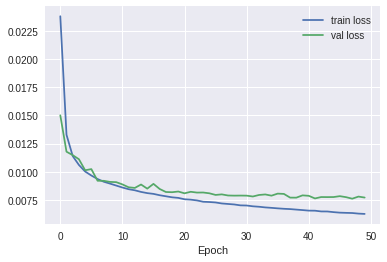

In [47]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'], label='train loss')
plt.plot(history['val_loss'], label='val loss')
# plt.title('Accuracy : Training vs Validation')
# plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

In [48]:
performance_test = model.evaluate(X_test, y_test)
print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))


3918/3918 [==============================] - 0s 46us/step
Test Loss : 0.013410,  Test Accuracy : 0.000%


In [0]:
# X_test= X_train[1200000:]
# y_test= y_train[1200000:]
predictions = model.predict(X_test)

In [50]:
print(predictions.shape)

(3918, 1)


[Text(0.5,1,'test')]

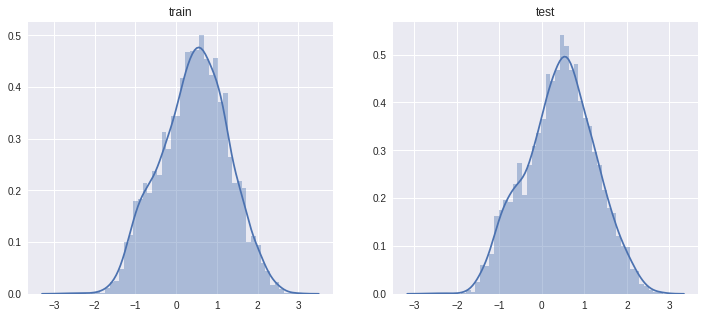

In [51]:
import seaborn as sns
fig, (ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_test,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")



In [0]:
# 테스트한다. 스코어확인
#scaler= scaler_list[-1]

In [53]:
pred_inv= scaler.inverse_transform(predictions.reshape(-1,1)).reshape(-1,)
pred_inv= np.exp(pred_inv)-1
pred_inv


array([10323040. ,  3877206.2,  3510700. , ...,  5390818. ,  5515185. ,
        2483937.8], dtype=float32)

In [54]:
ytest_inv= scaler.inverse_transform(y_test.values.reshape(-1,1)).reshape(-1,)
ytest_inv= np.exp(ytest_inv)-1
ytest_inv

array([11545824.35989473,  3079219.93095083,  2709427.7025159 , ...,
        5186216.49843369,  5065975.49481621,  2476975.91907602])

In [0]:
s1= pd.Series(pred_inv)
s2= pd.Series(ytest_inv)
# s1= pd.Series(predictions)
# s2= pd.Series(y_test.values.reshape(-1))

result_df= pd.DataFrame(s1)
result_df.columns=['pred']
result_df['ytest']= s2

In [0]:
result_df['pred']= result_df['pred'] * test_raw['exclusive_use_area']
result_df['ytest']= result_df['ytest'] * test_raw['exclusive_use_area']

In [57]:
tf= result_df[0:100]
tf.head(20)

,pred,ytest
0,8.627997e+08,9.650000e+08
1,4.155202e+08,3.300000e+08
2,1.269820e+08,9.800000e+07
3,2.214686e+08,2.440000e+08
4,1.678151e+08,1.430000e+08
5,7.264338e+08,7.490000e+08
6,3.971189e+08,4.050000e+08
7,1.469446e+09,1.415000e+09
8,8.787871e+08,8.150000e+08
9,2.748053e+08,2.880000e+08


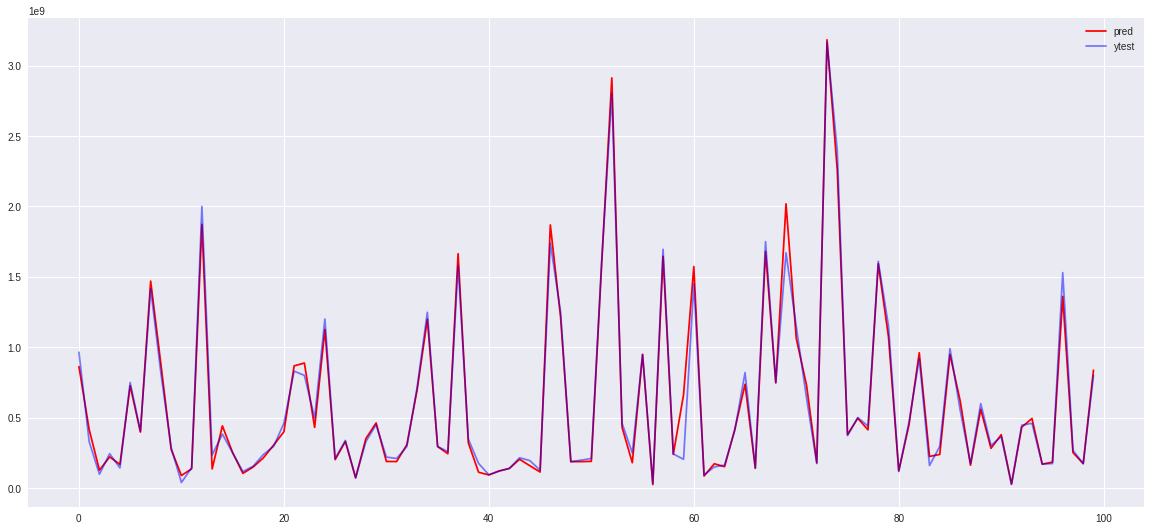

In [58]:
fig= plt.figure(figsize=(20,9))
ax1= fig.add_subplot(1,1,1)
ax1.plot(tf.index, tf['pred'], color='r')
ax1.plot(tf.index, tf['ytest'], color='b', alpha=0.5)
#ax1.plot(tf.index, tf['diff'])
ax1.legend()
ax1.grid
plt.show()

In [0]:
#tf['diff'].hist()

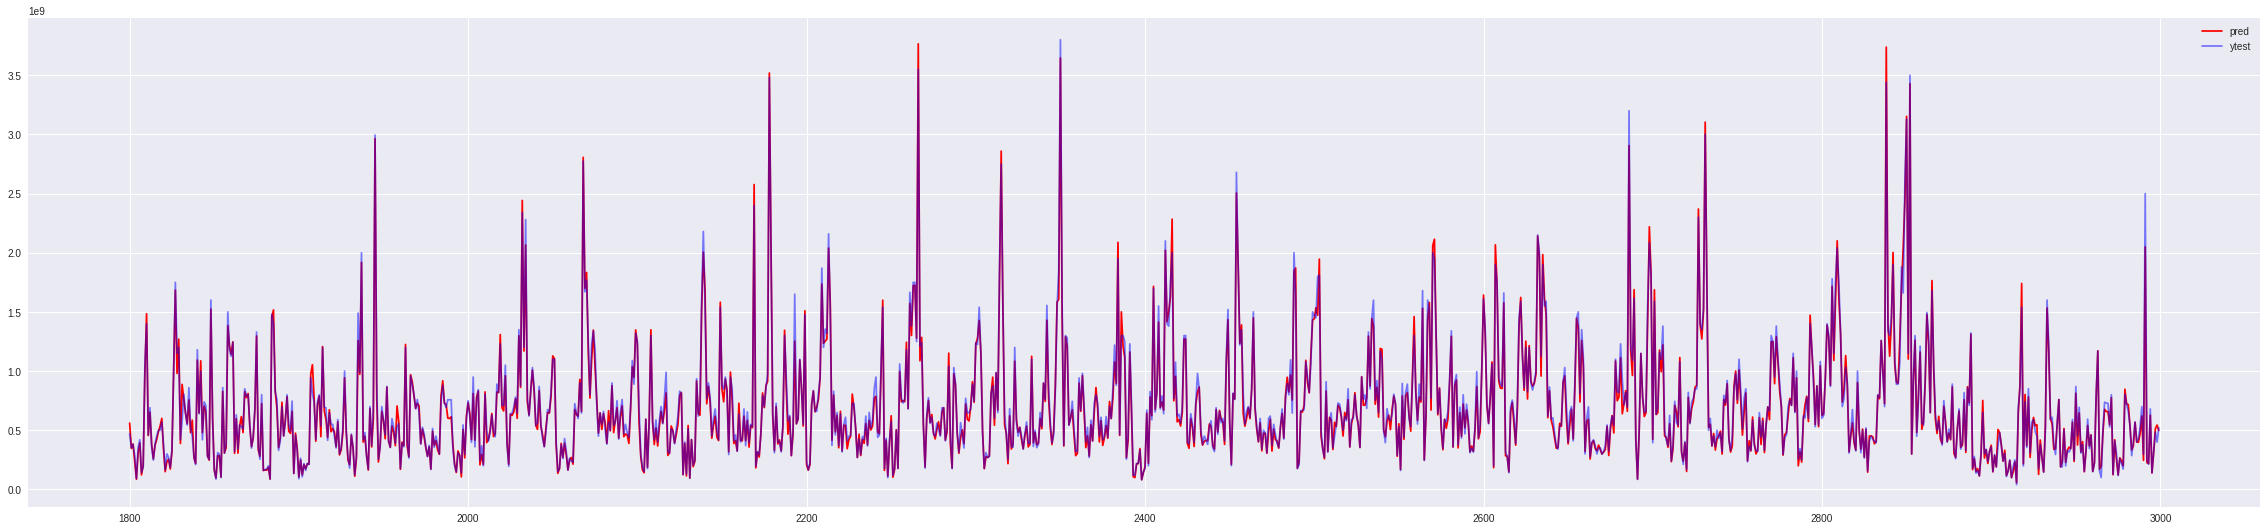

In [60]:
tf1= result_df[1800:3000]
fig= plt.figure(figsize=(40,9))
ax1= fig.add_subplot(1,1,1)
ax1.plot(tf1.index, tf1['pred'], color='r')
ax1.plot(tf1.index, tf1['ytest'], color='b', alpha=0.5)
ax1.legend()
ax1.grid
plt.show()


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

# rmse_score = make_scorer(rmse)
# rmse_score


In [62]:
rmse_value= rmse(result_df['pred'], result_df['ytest'])
rmse_value

62927147.344940856

In [63]:
rmse_value
# 86577456675287.39
# 397861.04020054603
# 1500000
# 2091304

# RF: 37752802
# 199365028
# 151570147
# DNN, 구*시간, area 73821500.23706238
# DNN, 구*시간(X), area 66621619.3024264
# DNN, 구*시간(X), area(X) 66150671.446786605 , 66850369.25240721, 68698392.99184343 -> 100회(기존50회) 돌리면 64614243.18769134


62927147.344940856

In [64]:
result_df.shape

(3918, 2)

In [0]:
#pip install openpyxl
result_df.to_csv('./result_df2.csv')